In [1]:
import numpy as np
import itertools
from qiskit.quantum_info import *
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

###  1 Gaussian wavepacket

In [12]:
n_qubits = 3
#sigma = np.sqrt((2**n_qubits)/(n_qubits))
sigma = (2**n_qubits)/(n_qubits*2) #not too high
p1 = 2.0
pos1 = 2**(n_qubits-1)-0.5
n = n_qubits
N = n_qubits


In [13]:
def gauss_1wp_circuit(sigma, mu1, n, N=10**3):
    """
    Returns: Quantum circuit with 1 gaussians wave packet

    Input args.:
        sigma: standard deviation
        mu1: initial mean position of wave packet
        n:recursion level
        N: cutoff for discrete version of the norm
    """
    
    def norm( sigma, mu, N):
        """
        Normalization factor.
        """
        return np.sum(np.exp((-(np.arange(-N, N+1, 1) - mu)**2)/float(sigma**2)))

    def alpha( sigma, mu, N=10**6):
        """ Angle for rotation gate"""
        
        return np.arccos(np.sqrt(norm(sigma/2., mu/2.,N)/norm(sigma, mu, N)))

    def qubitstrings( n):
        """
         n-bit strings in increasing lexicographic order
        """
        qubitstrings = []
        for q in itertools.product(['0', '1'], repeat=n):
            qubitstrings.append(''.join(q))
        return qubitstrings

    def meanq( q, mu):
        """
        For a  n-bit string, return mean for rotation angle

        """
        mu0 = mu
        for bit in q:
                mu0 = (mu0/2) - int(bit)/2
        return mu0

    def means( mu1, n):
        """
        list of means for rotation angles
        """

        mu_list = []
        qbstrings = qubitstrings(n)
        for qb in qbstrings:
            mu0 = meanq(qb, mu1)
            mu_list.append(mu0)
        return mu_list

    def angles( sigma, mu1, n):
        """
        list of rotation angles

        """
        sigma0 = sigma/(2.**n)
        listmu = means(mu1,n)

        angles0 = []
        for mu in listmu:
            angles0.append(alpha(sigma0, mu))
        return angles0


    M_angles=[]
    for nn in range(n):
        M_angles.append(angles(sigma, mu1, nn))

     
    # Circuit
    qr = QuantumRegister(n,'q')
    cr = ClassicalRegister(n,'c')
    qcirc = QuantumCircuit(qr, cr)
    
    qcirc.ry(2*M_angles[0][0], 0) #this applies the rotation for the 0th level, in this level we dont have case distinction
    
    #building the circuit
    for m in range(1, n): #Loop until the recursion level is done
        qcirc.barrier()
        ctrl_qubits = [] 
        for i in range(m): #Loop iterates from 0 to m-1 and represents the qubits that will act as control qubits for the multi-controlled gate. 
            ctrl_qubits.append(qr[i]) #Adds the qubit at index i to the ctrl_qubits list.
            print(m,"m")
        for i in range(2**m): #This loop iterates from 0 to 2^m-1  and represents the different combinations of control states. 
            for j in range(m):
                print(i,"i")
                print(int(2**(j)),"2**j")
                if i & int(2**(j)) == False: #check if the j-th bit in the binary representation of i is 0.
                    qcirc.x(m - j - 1) #apply bitflip to m-j-1 th qubit if this is the case, this initializez the qubits.    
                else:
                    pass
            qcirc.mcry(2*M_angles[m][i], ctrl_qubits, qr[m]) #Apply a multi-controlled RY gate to the qubit at index qr[m] in the quantum register qr, using the control qubits specified in ctrl_qubits. apply rotation from the angle register (angle*2 bec of qiskit notation)
            for j in range(0, m): 
                if i & int(2**(j)) == False:
                    qcirc.x(m - j - 1) #reset the qubits to initial state
    
    #qcirc.draw("mpl",justify="none")
    return M_angles,qcirc

        
        

    

#### Gaussian wave packet:

1 m
0 i
1 2**j
1 i
1 2**j
2 m
2 m
0 i
1 2**j
0 i
2 2**j
1 i
1 2**j
1 i
2 2**j
2 i
1 2**j
2 i
2 2**j
3 i
1 2**j
3 i
2 2**j
1.0000000000000007


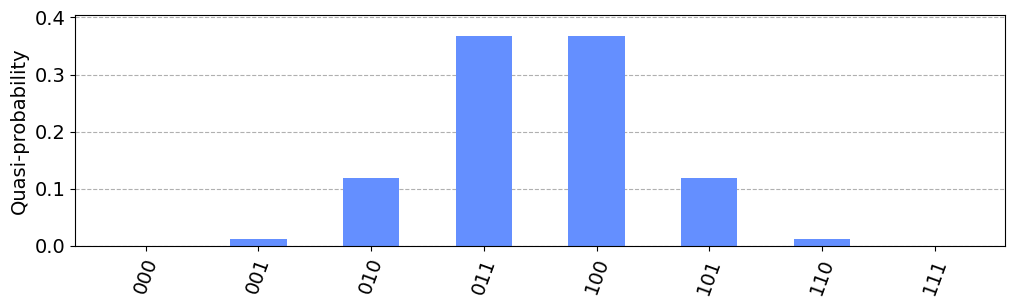

In [14]:
mtest0, testqc0 = gauss_1wp_circuit(sigma, pos1, n_qubits)

# print(Statevector(testqc0))#.draw(output='latex')
print(sum(Statevector(testqc0).probabilities()))
plot_histogram(Statevector(testqc0).probabilities_dict(),figsize= (12,3),sort='asc',bar_labels=False)


In [15]:
gauss_1wp_circuit(sigma, mu1, n, N=10**3)

NameError: name 'mu1' is not defined

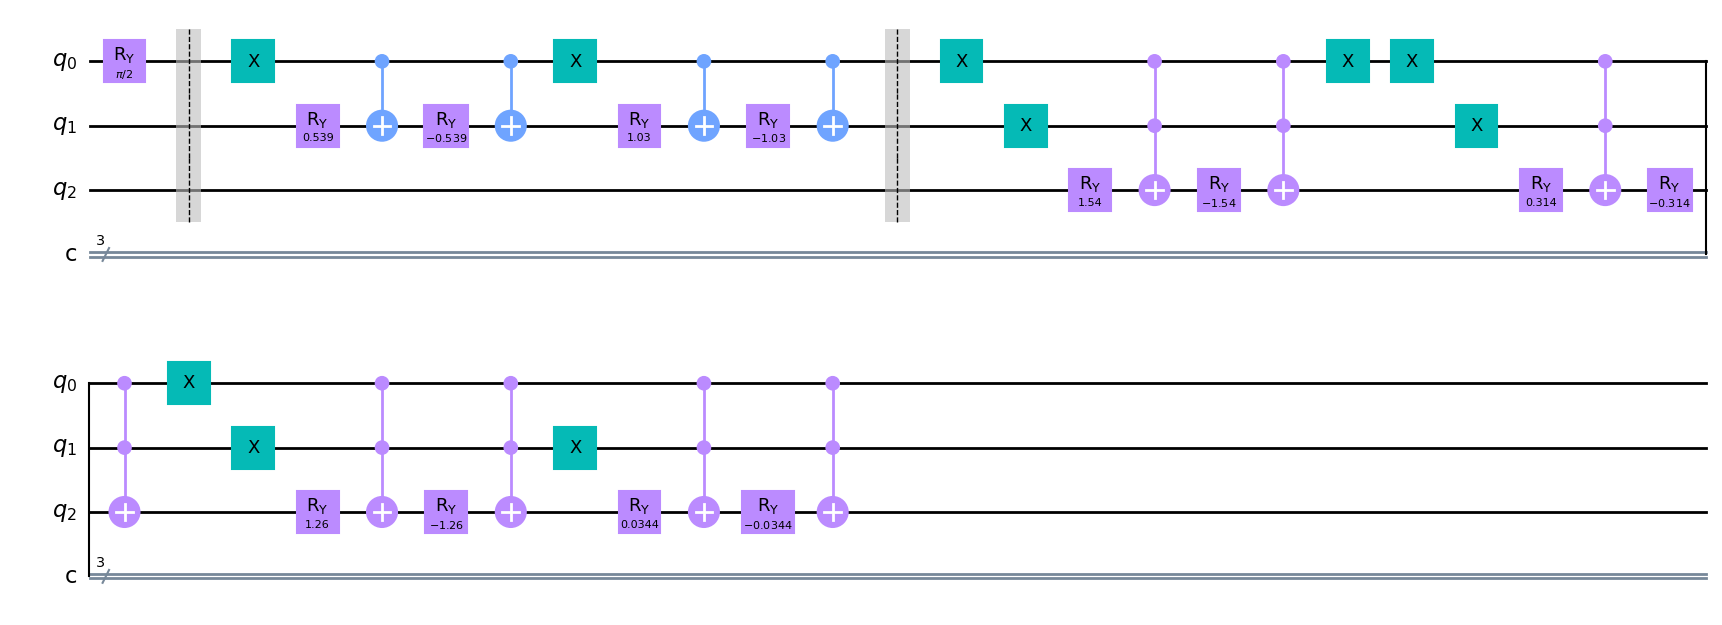

In [16]:
testqc0.draw("mpl",justify="none")